# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Progress bar
from tqdm import tqdm_notebook

# Output File (CSV)
output_data_file = os.path.join("output_data/cities_weather.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#URL for Weather Map API call (Save config info)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url=f"{url}appid={api_key}&units={units}&q="

#City weather data
cityname=[]
cloudiness=[]
country=[]
date=[]
humidity=[] 
lat=[]
lgn=[]
maxtemp=[]
windspeed=[]
count=0


response=requests.post(query_url)


#Query Start
print("Beginning Data Retrival")
print("-----------------------------")

#Query Loop with Progress bar
x=0
for city in tqdm_notebook(cities):
    
    try:
        response=requests.get(query_url+city).json()
    
        x = x+1
        print(f'Processing Record {x} | {city}')

        cityname.append(response['name']) 
        cloudiness.append(response['clouds']['all']) 
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])   
        lgn.append(response['coord']['lon'])    
        maxtemp.append(response['main']['temp_max'])      
        humidity.append(response['main']['humidity'])       
        windspeed.append(response['wind']['speed'])      
            
        
    #If error skip city    
    except:
        print('City not found. Skipping')

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrival
-----------------------------


Processing Record 1 | toora-khem
Processing Record 2 | upernavik
Processing Record 3 | damara
Processing Record 4 | mar del plata
Processing Record 5 | odienne
Processing Record 6 | mahebourg
Processing Record 7 | cayenne
Processing Record 8 | port alfred
Processing Record 9 | ushuaia
Processing Record 10 | mushie
Processing Record 11 | broken hill
Processing Record 12 | ancud
Processing Record 13 | pangnirtung
Processing Record 14 | swarzedz
Processing Record 15 | punta arenas
Processing Record 16 | saint-philippe
Processing Record 17 | maine-soroa
Processing Record 18 | cidreira
Processing Record 19 | necochea
Processing Record 20 | geraldton
Processing Record 21 | cape town
Processing Record 22 | lorengau
Processing Record 23 | vila do maio
Processing Record 24 | rikitea
Processing Record 25 | galesong
Processing Record 26 | bredasdorp
Processing Record 27 | esperance
Processing Record 28 | thompson
Processing Record 29 | kaitangata
Processing Record 30 | butaritari
Processing Recor

Processing Record 232 | bur gabo
City not found. Skipping
Processing Record 233 | jalu
Processing Record 234 | perth
Processing Record 235 | belushya guba
City not found. Skipping
Processing Record 236 | severo-kurilsk
Processing Record 237 | sakakah
City not found. Skipping
Processing Record 238 | kushiro
Processing Record 239 | pevek
Processing Record 240 | pathein
Processing Record 241 | ciudad bolivar
Processing Record 242 | richards bay
Processing Record 243 | juquia
Processing Record 244 | malgrat de mar
Processing Record 245 | yasothon
Processing Record 246 | jiwani
Processing Record 247 | cap malheureux
Processing Record 248 | shu
Processing Record 249 | loa janan
Processing Record 250 | salinas
Processing Record 251 | aloleng
Processing Record 252 | muzquiz
City not found. Skipping
Processing Record 253 | gayny
Processing Record 254 | sungaipenuh
Processing Record 255 | pacifica
Processing Record 256 | santa cecilia
Processing Record 257 | longyearbyen
Processing Record 258 | 

Processing Record 458 | luwuk
Processing Record 459 | saint-pierre
Processing Record 460 | prizren
City not found. Skipping
Processing Record 461 | gambo
Processing Record 462 | kamenka
Processing Record 463 | ahuimanu
Processing Record 464 | villazon
City not found. Skipping
Processing Record 465 | virginia beach
Processing Record 466 | opoczno
Processing Record 467 | havelock
Processing Record 468 | sola
Processing Record 469 | raga
City not found. Skipping
Processing Record 470 | dabakala
Processing Record 471 | phan rang
City not found. Skipping
Processing Record 472 | shimoda
Processing Record 473 | antalaha
Processing Record 474 | coxim
Processing Record 475 | mabaruma
Processing Record 476 | lubango
Processing Record 477 | neiafu
Processing Record 478 | mawlaik
Processing Record 479 | bafq
Processing Record 480 | lashio
Processing Record 481 | aguimes
Processing Record 482 | luziania
Processing Record 483 | hami
Processing Record 484 | bay roberts
Processing Record 485 | san lui

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Covert to Data Frame
weather_df=({"City":cityname, "Cloudiness":cloudiness, "Country": country, "Date":date,
             "Humidity":humidity, "Lat":lat, "Lng":lgn, "Max Temp":maxtemp, "Wind Speed":windspeed})
weather_df=pd.DataFrame(weather_df)
#Save to CSV
weather_df.to_csv(output_data_file)
#Count records. Make sure there is no missing data
weather_df.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [5]:
#Display Data Frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Toora-Khem,54,RU,1563498062,84,52.47,96.11,57.29,2.19
1,Upernavik,100,GL,1563498062,88,72.79,-56.15,45.05,9.64
2,Damara,0,CF,1563498062,100,4.96,18.70,71.60,2.71
3,Mar del Plata,20,AR,1563498062,45,-46.43,-67.52,45.95,35.14
4,Odienne,45,CI,1563498062,96,9.51,-7.57,72.05,3.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

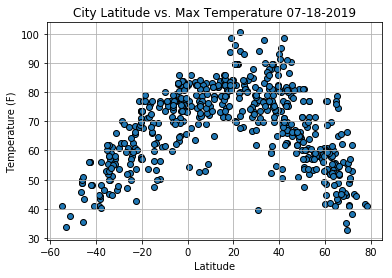

In [13]:
#Build scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolor="black")

#Graph Properties
plt.title(f"City Latitude vs. Max Temperature {datetime.today().strftime('%m-%d-%Y')}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
          
#Save File
plt.savefig("Images/CityLatitude_vs_MaxTemp.png")
          
#Show plot
plt.show()

#### Latitude vs. Humidity Plot

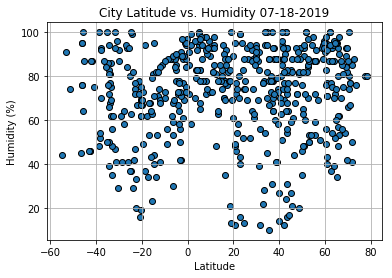

In [14]:
#Build scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolor="black")

#Graph Properties
plt.title(f"City Latitude vs. Humidity {datetime.today().strftime('%m-%d-%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
#Save File
plt.savefig("Images/CityLatitude_vs_Humidity.png")
          
#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

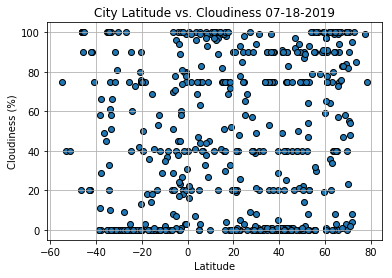

In [15]:
#Build scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolor="black")

#Graph Properties
plt.title(f"City Latitude vs. Cloudiness {datetime.today().strftime('%m-%d-%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
#Save File
plt.savefig("Images/CityLatitude_vs_Cloudiness.png")
          
#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

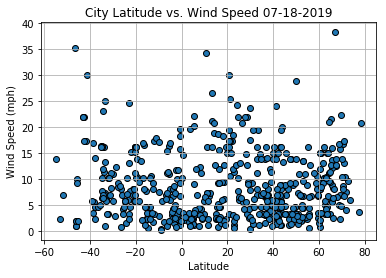

In [16]:
#Build scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolor="black")

#Graph Properties
plt.title(f"City Latitude vs. Wind Speed {datetime.today().strftime('%m-%d-%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
          
#Save File
plt.savefig("Images/CityLatitude_vs_WindSpeed.png")
          
#Show plot
plt.show()